In [26]:
import numpy as np
from Variable import Variable
location = [(50, 50),(0, 50),(0, 0),(50, 0),(50, 100),(100,100)]
num_of_customers=5
cus_depot = 6
distance = np.zeros((6,6),dtype=np.int16)
for i in range(len(location)):
    for j in range(len(location)):
        distance[i,j] = abs(location[i][0]-location[j][0])+abs(location[i][1]-location[j][1])

In [27]:
decision_variables = []
for i in range(num_of_customers+1):
    decision_variables.append([])
    for j in range(num_of_customers+1):
        decision_variables[i].append(Variable('I',[0,1],'x%d%d'%(i,j)))
for i in range(num_of_customers+1):
    decision_variables[0][i]['upper_bound']=2

In [28]:
variables_1dim = []
rel = np.zeros((cus_depot,cus_depot),dtype=np.int16)
x = 0
dist_1dim = []
mapping = dict() # get a dict like : mapping = {'01':0,'02':1,'03':2 ...} 
ind1=[] # ind1 each customer has remain decision_variables
for i in range(cus_depot):
    ind1.append(num_of_customers-i)

for i in range(cus_depot):
    for j in range(ind1[i]):
        variables_1dim.append(decision_variables[i][i+j+1])
        dist_1dim.append(distance[i][i+j+1])
        rel[i][i+j+1] = x
        mapping['%d%d'%(i,i+j+1)] = x
        x+=1

In [29]:
list_customer = list(range(cus_depot))
list_customer

[0, 1, 2, 3, 4, 5]

In [30]:
import copy
for i in range(1,cus_depot):
    list_cur = copy.deepcopy(list_customer)
    list_cur.remove(i)
    print(list_cur)

[0, 2, 3, 4, 5]
[0, 1, 3, 4, 5]
[0, 1, 2, 4, 5]
[0, 1, 2, 3, 5]
[0, 1, 2, 3, 4]


In [31]:
list_customer

[0, 1, 2, 3, 4, 5]

In [32]:
for i in range(len(variables_1dim)):
    print(variables_1dim[i].name)

x01
x02
x03
x04
x05
x12
x13
x14
x15
x23
x24
x25
x34
x35
x45


In [33]:
rows1 = []
for i in range(num_of_customers):
    rows1.append([])
    for j in range(2):
        rows1[i].append([])

In [34]:
rows1 = []
for i in range(num_of_customers):
    rows1.append([])
    for j in range(2):
        rows1[i].append([])
for i in range(1,cus_depot):
    list_cur = copy.deepcopy(list_customer)
    list_cur.remove(i)
    for j in list_cur:
        if j < i:
            rows1[i-1][0].append('x%d%d'%(j,i))
            rows1[i-1][1].append(1)
            
        else:
            rows1[i-1][0].append('x%d%d'%(i,j))
            rows1[i-1][1].append(1)

In [35]:
rows1

[[['x01', 'x12', 'x13', 'x14', 'x15'], [1, 1, 1, 1, 1]],
 [['x02', 'x12', 'x23', 'x24', 'x25'], [1, 1, 1, 1, 1]],
 [['x03', 'x13', 'x23', 'x34', 'x35'], [1, 1, 1, 1, 1]],
 [['x04', 'x14', 'x24', 'x34', 'x45'], [1, 1, 1, 1, 1]],
 [['x05', 'x15', 'x25', 'x35', 'x45'], [1, 1, 1, 1, 1]]]

In [36]:
row2 = []

for i in range(num_of_customers):
    row2 = [['x%d%d'%(0,i+1)],[1]*num_of_customers]

In [37]:
row2 = [[]]
for i in range(2):
    row2[0].append([])
for i in range(num_of_customers):
    row2[0][0].append('x%d%d'%(0,i+1))
    row2[0][1].append(1)

In [38]:
from Constraint import Constraint
from Objective import Objective

In [39]:
rows = rows1+row2


obj = Objective('min',dist_1dim)

right_side = [1]*num_of_customers
right_side.append(2)
constraints = [Constraint('c%d'%(i+1), rows[i], 'E', right_side[i]) for i in range(len(rows))]

In [169]:
rows1 = []
for i in range(num_of_customers):
    rows1.append([])
    for j in range(2):
        rows1[i].append([])
for i in range(1,cus_depot):
    list_cur = copy.deepcopy(list_customer)
    list_cur.remove(i)
    for j in list_cur:
        if j < i:
            rows1[i-1][0].append('x%d%d'%(j,i))
            rows1[i-1][1].append(1)
        else:
            rows1[i-1][0].append('x%d%d'%(i,j))
            rows1[i-1][1].append(1)
row2 = [[]]
for i in range(2):
    row2[0].append([])
for i in range(num_of_customers):
    row2[0][0].append('x%d%d'%(0,i+1))
    row2[0][1].append(1)

In [40]:
lowerbounds = []
upperbounds = []
var_names = []
var_types = []
for i in range(len(variables_1dim)):
    lowerbounds.append(variables_1dim[i].lower_bound)
    upperbounds.append(variables_1dim[i].upper_bound)
    var_names.append(variables_1dim[i].name)
    var_types.append(variables_1dim[i].type)

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 6 rows, 15 columns, and 30 nonzeros.
Reduced MIP has 10 binaries, 5 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.01 ticks)
Found incumbent of value 471.000000 after 0.02 sec. (0.03 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 6 rows, 15 columns, and 30 nonzeros.
Reduced MIP has 10 binaries, 5 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.02 ticks)
Probing time = 0.00 sec. (0.00 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.00 sec. (0.01 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                          471.0000        0.0000           100.00%
*     0     0      integra

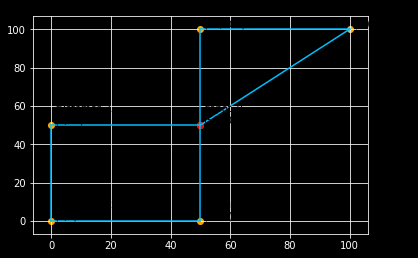

In [1]:
"""
model the SCVRP & solve the problem
problem:
K = 2
Capacity 100
N = 5
demand 0 20 30 40 50 50

"""
import re
import copy
import numpy as np
import cplex
from cplex.exceptions import CplexError
import matplotlib.pyplot as plt 
from Variable import Variable
from Constraint import Constraint
from Objective import Objective
from Result import Result


def get_parameter(file_name):
    input_prob = []
    input_problem = dict()
    with open(file_name) as f:
        for line in f.readlines():
            input_prob.append(line.strip('\n'))
    for j in range(6):
        cur_str_list = input_prob[j].split()
        input_problem[cur_str_list[0]] = " ".join(cur_str_list[2:])
    dim = int(input_problem['DIMENSION'])
    
    type_of_vrp = input_prob[0].split()
    type_of_vrp = type_of_vrp[2]
    k_order_1 = re.search('-k',type_of_vrp).span()
    K =int(list(type_of_vrp)[k_order_1[1]])
    location = []
    demand = []
    for j in range(7, 7+dim):
        cur = input_prob[j].split()
        del cur[0]
        cur_location = (int(cur[0]),int(cur[1]))
        location.append(cur_location)
    for j in range(14, 14+dim):
        cur_demand = input_prob[j].split()
        del cur_demand[0]
        cur_demand = int(cur_demand[0])
        demand.append(cur_demand)
    return location, demand,K
            

def get_problem(location):
    num_of_customers = len(location)-1
    cus_depot = len(location)
    # # manhatten distance 
    # for i in range(len(location)):
    #     for j in range(len(location)):
    #         distance[i,j] = abs(location[i][0]-location[j][0])+abs(location[i][1]-location[j][1])

    # euclidean distance
    distance = np.zeros((6,6),dtype=np.int16)
    for i in range(len(location)):
        for j in range(len(location)):
            distance[i,j] = ((location[i][0]-location[j][0])**2+(location[i][1]-location[j][1])**2)**0.5
    decision_variables = []
    for i in range(num_of_customers+1):
        decision_variables.append([])
        for j in range(num_of_customers+1):
            decision_variables[i].append(Variable('I',[0,1],'x%d%d'%(i,j)))
    for i in range(num_of_customers+1):
        decision_variables[0][i]['upper_bound']=2.0

    variables_1dim = []
    rel = np.zeros((cus_depot,cus_depot),dtype=np.int16)
    x = 0
    dist_1dim = []
    mapping = dict() # get a dict like : mapping = {'01':0,'02':1,'03':2 ...} 
    ind1=[] # ind1 each customer has remain decision_variables
    list_customer = list(range(cus_depot))
    for i in range(cus_depot):
        ind1.append(num_of_customers-i)

    for i in range(cus_depot):
        for j in range(ind1[i]):
            variables_1dim.append(decision_variables[i][i+j+1])
            dist_1dim.append(float(distance[i][i+j+1]))
            rel[i][i+j+1] = x
            mapping['%d%d'%(i,i+j+1)] = x
            x+=1

    # for customer i
    # m<i,give x_mi
    # m>i give x_im m\in {0,1,...,5}
    rows1 = []
    for i in range(num_of_customers):
        rows1.append([])
        for j in range(2):
            rows1[i].append([])
    for i in range(1,cus_depot):
        list_cur = copy.deepcopy(list_customer)
        list_cur.remove(i)
        for j in list_cur:
            if j < i:
                rows1[i-1][0].append(mapping['%d%d'%(j,i)])
                rows1[i-1][1].append(1)
            else:
                rows1[i-1][0].append(mapping['%d%d'%(i,j)])
                rows1[i-1][1].append(1)
    '''
    [[['x01', 'x12', 'x13', 'x14', 'x15'], [1, 1, 1, 1, 1]],
    [['x02', 'x12', 'x23', 'x24', 'x25'], [1, 1, 1, 1, 1]],
    [['x03', 'x13', 'x23', 'x34', 'x35'], [1, 1, 1, 1, 1]],
    [['x04', 'x14', 'x24', 'x34', 'x45'], [1, 1, 1, 1, 1]],
    [['x05', 'x15', 'x25', 'x35', 'x45'], [1, 1, 1, 1, 1]]]
    transfer to variables_1dim and get:
    [['x0', 'x5', 'x6', 'x7', 'x8'], [1, 1, 1, 1, 1]]
    [['x1', 'x5', 'x9', 'x10', 'x11'], [1, 1, 1, 1, 1]]
    [['x2', 'x6', 'x9', 'x12', 'x13'], [1, 1, 1, 1, 1]]
    [['x3', 'x7', 'x10', 'x12', 'x14'], [1, 1, 1, 1, 1]]
    [['x4', 'x8', 'x11', 'x13', 'x14'], [1, 1, 1, 1, 1]]
    [['x0', 'x1', 'x2', 'x3', 'x4'], [1, 1, 1, 1, 1]]

    '''
    # for depot0 : 
    row2 = [[]]
    for i in range(2):
        row2[0].append([])
    for i in range(num_of_customers):
        row2[0][0].append(i)
        row2[0][1].append(1)
    '''
    [['x01', 'x02', 'x03', 'x04', 'x05'], [1, 1, 1, 1, 1]]
    '''
    rows = rows1+row2

    my_obj = Objective('min',dist_1dim)

    right_side = [2.0]*num_of_customers
    right_side.append(2.0*K)
    constraints = [Constraint('c%d'%(i+1), rows[i], 'E', right_side[i]) for i in range(len(rows))]
    relation = ['E']*len(constraints)
    var_names = ['x%d'%(i+1) for i in range(int(cus_depot*(cus_depot-1)/2))]
    row_names = ['c%d'%(i+1) for i in range(cus_depot)]
    lowerbounds = []
    upperbounds = []
    var_types = []
    for i in range(len(variables_1dim)):
        # lowerbounds.append(float(variables_1dim[i].lower_bound))
        # upperbounds.append(float(variables_1dim[i].upper_bound))
        lowerbounds.append(variables_1dim[i].lower_bound)
        upperbounds.append(variables_1dim[i].upper_bound)
        var_types.append(variables_1dim[i].type)
    lin_expression = [cplex.SparsePair(ind = rows[i][0], val = rows[i][1]) for i in range(len(rows))]
    return dist_1dim,cus_depot,K,num_of_customers,my_obj,lowerbounds,upperbounds,var_types,var_names,lin_expression,row_names,relation,right_side,mapping
# location = [(50, 50),(0, 50),(0, 0),(50, 0),(50, 100),(100,100)]

# init the decision variables 


def generate_problem(my_obj,lowerbounds,upperbounds,var_types,var_names,lin_expression,row_names,relation,right_side,prob):
    if my_obj.preference == 'min':
        prob.objective.set_sense(prob.objective.sense.minimize)
    elif my_obj.preference == 'max':
        prob.objective.set_sense(prob.objective.sense.maximize)
    else:
        print('You had input the wrong objective preference!')
    # !!! all obj&ub&lb need be float.
    prob.variables.add(obj=my_obj.coefficient,lb=lowerbounds,ub=upperbounds,names=var_names,types=var_types)
    prob.linear_constraints.add(lin_expr=lin_expression,senses=relation,rhs=right_side,names=row_names)
    pass


def calculate():
    try:
        my_prob = cplex.Cplex()
        generate_problem(my_obj,lowerbounds,upperbounds,var_types,var_names,lin_expression,row_names,relation,right_side,my_prob)
        my_prob.solve()
    except CplexError as exc:
        print(exc)
    num_rows = my_prob.linear_constraints.get_num()
    num_cols = my_prob.variables.get_num()
    print("Solution status = ", my_prob.solution.get_status(), ":", end=' ')
    print(my_prob.solution.status[my_prob.solution.get_status()])
    print("Solution value  = ", my_prob.solution.get_objective_value())
    x = my_prob.solution.get_values()
    for j in range(num_cols):
        print("Column %d:  Value = %10f " % (j, x[j]))
    res = Result(is_solved=my_prob.solution.get_status(),
                 objective_value=my_prob.solution.get_objective_value(),
                 x_value=x, status=my_prob.solution.status[my_prob.solution.get_status()])
    print("Problem:{0}\nOptimal Value:{1}\nSolution:{2}".format(my_prob.solution.status[res.is_solved],res.obj_value, [int(res.x_value[i]) for i in range(len(res.x_value))]))
    my_prob.write("vrp.lp")
    return x

def get_connect(x):
    x = [int(x[i]) for i in range(len(x))]
    connection = []
    for k,value in zip(mapping.keys(),x):
        if value == 1:
            connection.append(k)
    # to get the tuple list like [ (0,1),(0,2).....]
    conn_lines = []
    for i in connection:
        conn_lines.append(tuple([int(i) for i in list(i)]))
    return conn_lines

def plot_result(conn_lines):
    x = []
    y = [] 
    # conn_lines = [(0, 1), (0, 3), (0, 4), (0, 5), (1, 2), (2, 3), (4, 5)]
    txt = ['depot_0'] + ['customer_%d'%(i+1) for i in range(len(location)-1)]
    for i in range(len(location)):
        x.append(location[i][0])
        y.append(location[i][1])
    connect_x = []
    connect_y = []
    for i in range(len(conn_lines)):
        connect_x.append([location[conn_lines[i][0]][0],location[conn_lines[i][1]][0]])    
        connect_y.append([location[conn_lines[i][0]][1],location[conn_lines[i][1]][1]])
    # print('x:',connect_x,'\ny:',connect_y)
    plt.grid(True)
    for i in range(len(connect_x)):
        plt.plot(connect_x[i],connect_y[i],color='#00BFFF')
    plt.scatter(x,y,color='orange')
    plt.scatter(x[0],y[0],color='r')
    for i in range(len(x)):
        plt.annotate(txt[i]+'\n(%d,%d)'%(x[i],y[i]), xy = (x[i], y[i]), 
                                xytext = (x[i]+1, y[i]+1),color='black')
    plt.show()

if __name__ == '__main__':
    location,demand,K = get_parameter('A-n6-k2.vrp')
    dist_1dim,cus_depot,K,num_of_customers,my_obj,lowerbounds,upperbounds,var_types,var_names,lin_expression,row_names,relation,right_side,mapping = get_problem(location)
    x = calculate()
    conn_lines = get_connect(x)
    plot_result(conn_lines)
